<a href="https://colab.research.google.com/github/jesusbarrosomx/orden_book/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install python-binance
!pip install matplotlib
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
import binance
import pandas as pd
import matplotlib.pyplot as plt



In [153]:
client = binance.Client()

In [154]:
order_book = client.futures_order_book(symbol = "BTCUSDT" , limit = 1000 )
price_now = client.futures_mark_price(symbol = "BTCUSDT")

In [167]:
order_book = pd.DataFrame(order_book)
bids = pd.DataFrame(order_book["bids"])
asks = pd.DataFrame(order_book["asks"])
#float(asks.head(1)["asks"][0][0])
ask_min = float(asks["asks"].iloc[0][0])
bid_max = float(bids["bids"].iloc[-1][0])
price = float(price_now["markPrice"])
dif_pct = difPct(bid_max, ask_min, price)
print( f"price {price} \n Diferencia  : {ask_min- bid_max} \n Diferencia PTC: {dif_pct} "  ) 



price 23904.06897058 
 Diferencia  : 132.39999999999782 
 Diferencia PTC: 0.5538805973282185 


In [156]:
def difPct (bid , ask , pr):
  return ((ask -bid )/(pr/100))

In [163]:
prices_b = [float(x[0]) for x in order_book["bids"]]
prices_a = [float(x[0]) for x in order_book["asks"]]
qtts_b = [float(x[1]) for x in order_book["bids"]]
qtts_a = [float(x[1]) for x in order_book["asks"]]

p_b = pd.to_numeric(prices_b)
p_a = pd.to_numeric(prices_a)
q_b = pd.to_numeric(qtts_b)
q_a = pd.to_numeric(qtts_a)


#for i in order_book["bids"] :
 # print (float(i[0]), float(i[1]))

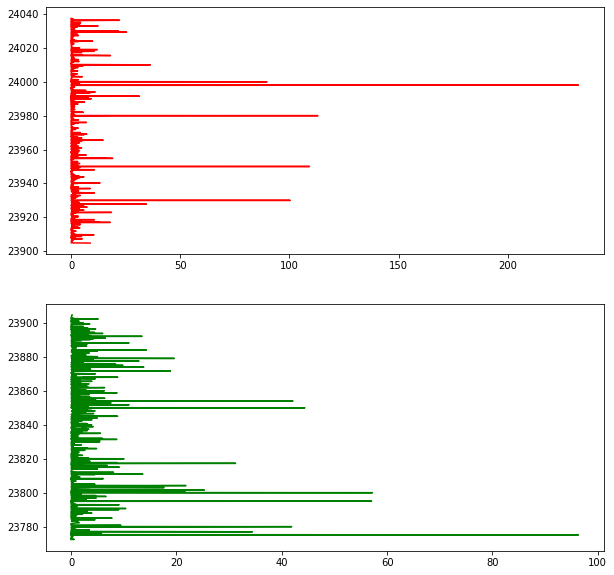

In [168]:
fig, ax = plt.subplots(2, figsize = (10,10))
ax[0].plot(q_a,p_a , color = "r")

ax[1].plot(q_b, p_b, color = 'g')




In [169]:
b_M = q_b.max()
a_M = q_a.max()
bys = []
sls = []
for i in range (0, len(prices_b)) :
  if qtts_b[i] > b_M/2 :
    bys.append(prices_b[i])

for i in range (0, len(prices_a)) :
  if qtts_a[i] > a_M/2 :
    sls.append(prices_a[i])

    print(f" compras:{bys} /n ventas: {sls}")

 compras:[23800.0, 23795.0, 23775.2] /n ventas: [23998.0]
